In [143]:
#import h5py
import heapq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


In [ ]:
#f = h5py.File('mytestfile.hdf5', 'r')

In [3]:
#Generate list of random vectors
V = np.random.uniform(size=(1000,100))

In [4]:
V.shape

(1000, 100)

In [114]:
#implemented exactly as 4.2 from https://publications.hse.ru/mirror/pubs/share/folder/x5p6h7thif/direct/128296059
def knnsearch(q, m, k, G): #additional parameter - Graph G
    tempRes = []
    candidates = []
    visitedSet = {}
    result = []
    
    
    for i in range(0,m):
        
        rnd_ind = np.random.randint(0,len(G.nodes()))
        dist = np.linalg.norm(q-G.nodes[rnd_ind]['v'])
        
        #added this to ensure the algorithm works if there are not many nodes
        if len(G.nodes()) == 1:
            return [(dist,rnd_ind,G.nodes[rnd_ind]['v'])]
        
        heapq.heappush(candidates, (dist,rnd_ind,G.nodes[rnd_ind]['v'])) #instead of the "TreeSet" I used heap
        
        tempRes = []
        while True:
            #added another stop condition
            if len(candidates) == 0:
                break
            c = heapq.heappop(candidates)
            
            if len(result) >= k:
                tst = heapq.nlargest(k, result)[-1]
                if c[0] > tst[0]:
                    break
        
            neighbors = list(G.neighbors(c[1])) #networkx function to list neighbors ("friends")
            for n in neighbors:
                if n not in visitedSet:
                    visitedSet[n] = 1
                    dist = np.linalg.norm(q-G.nodes[n]['v'])
                    heapq.heappush(candidates, (dist,n,G.nodes[n]['v']))
                    heapq.heappush(tempRes, (dist,n,G.nodes[n]['v']))
                #print(result)    
        result = list(heapq.merge(result,tempRes))
            #print(result)
    return heapq.nsmallest(k, result)

In [135]:
G = nx.Graph() #create empty graph
G.add_node(0,v = V[0]) #add starting node
#knnsearch(V[1],5,5,G)
G.add_node(1,v = V[1]) #add next node
G.add_edge(0,1) #add edge between them
nodes = knnsearch(V[2],5,5,G) #search nodes for query q = V[2]
G.add_node(2, v=V[2]) #add the node
for i in nodes: #add edges
    G.add_edge(i[1], 2)

In [136]:
for i in range(3, 1000): #add the nodes and the edges, as in https://publications.hse.ru/mirror/pubs/share/folder/x5p6h7thif/direct/128296059 section 4.2, at the end
    nodes = knnsearch(V[i],5,5,G)
    G.add_node(i, v=V[i])
    for node in nodes:
        G.add_edge(node[1], i)

In [137]:
#search top-5 items close to V[2] using our method
for i,j in enumerate(knnsearch(V[2],5,5,G)):
    print("Top #%s, Node id %s, distance %s"%(i,j[1],j[0]))

Top #0, Node id 2, distance 0.0
Top #1, Node id 765, distance 3.300933665250074
Top #2, Node id 401, distance 3.3177719172756572
Top #3, Node id 397, distance 3.36126561679246
Top #4, Node id 817, distance 3.415036275508237


In [138]:
#validate with simple search
for n, node in enumerate(sorted([(np.linalg.norm(V[2]-j),i) for i,j in enumerate(V)])[:5]):
    print("Top #%s, Node id %s, distance %s"%(n, node[1],node[0]))

Top #0, Node id 2, distance 0.0
Top #1, Node id 765, distance 3.300933665250074
Top #2, Node id 401, distance 3.3177719172756572
Top #3, Node id 397, distance 3.36126561679246
Top #4, Node id 817, distance 3.415036275508237


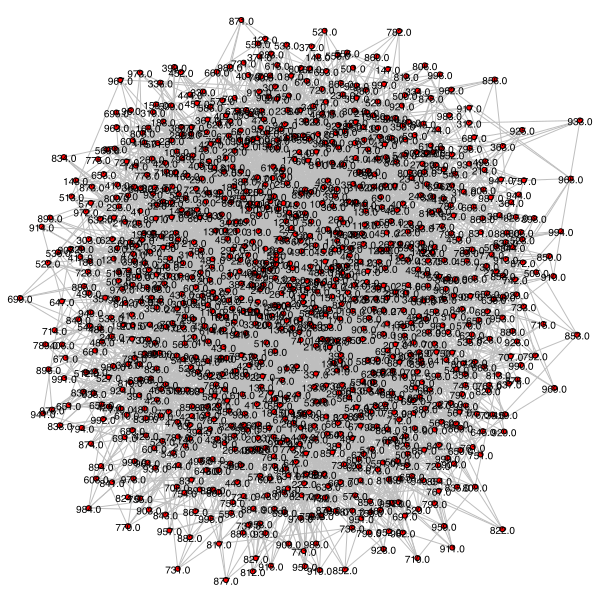

In [141]:
#convert graph from nx to igraph for proper plotting
G1 = nx.Graph()

for i,j in G.edges():
    G1.add_edge(i,j)
import igraph as ig


for i in G.nodes():
    #print(i)
    G1.nodes[i]['label'] = str(int(i))
nx.write_graphml(G1,'graph.graphml')    
Gix = ig.read('graph.graphml',format="graphml")
layout = Gix.layout("fr")
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["title"] = "fffff"

visual_style["vertex_label_size"] = 10
#visual_style["edge_width"] = [0.05*int(i) for i in Gix.es['w']]
visual_style["edge_size"] = 1
visual_style['edge_color'] = 'gray'
visual_style['edge_arrow_size'] = 0.5
ig.plot(Gix,**visual_style)

Text(0.5,0,'Rank')

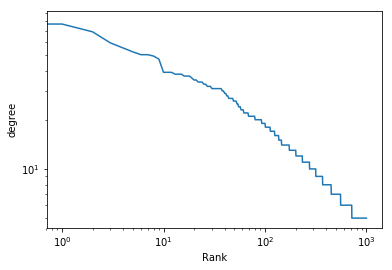

In [145]:
#degree distribution
plt.plot(range(0,len(G.nodes())),sorted([i[1] for i in G.degree()],reverse=True))
plt.yscale('log') 
plt.xscale('log') 
plt.ylabel('degree')
plt.xlabel('Rank')
#log-log degree plot should be looking like a line

In [146]:
#average shortest path
nx.average_shortest_path_length(G)

3.1225205205205206